In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')

# static

In [2]:
static = pd.read_csv('../data/static.csv')

In [3]:
prev_shape = static.shape
num_duplicated_rows = static.duplicated().sum()
print(f'Number of duplicated rows {static.duplicated().sum()}')
if num_duplicated_rows == 0:
    print('There are no duplicate rows to drop')
else: 
    print('Proceeding to drop duplicates...')
    static = static.drop_duplicates()
    print(f'dynamic shape has been reduced from {prev_shape} to {static.shape}')

Number of duplicated rows 0
There are no duplicate rows to drop


In [4]:
print((static['los_icu'] < 1).sum())

0


In [5]:
static['gender'] = static['gender'].map({'M': 0, 'F': 1})

In [6]:
static['race'] = static['race'].map(
    {"WHITE": "white", 
     "WHITE - OTHER EUROPEAN": "white",
     "WHITE - RUSSIAN": "white",
     "WHITE - EASTERN EUROPEAN": "white", 
     "WHITE - BRAZILIAN": "white", 
     "PORTUGUESE": "white",
     "BLACK/AFRICAN AMERICAN": "black", 
     "BLACK/CAPE VERDEAN": "black", 
     "BLACK/CARIBBEAN ISLAND": "black",
     "BLACK/AFRICAN": "black", 
     "ASIAN": "asian", 
     "ASIAN - CHINESE": "asian",
     "ASIAN - SOUTH EAST ASIAN": "asian", 
     "ASIAN - ASIAN INDIAN": "asian", 
     "ASIAN - KOREAN": "asian",
     "HISPANIC/LATINO - PUERTO RICAN": "hispanic_latino", 
     "HISPANIC OR LATINO": "hispanic_latino", 
     "HISPANIC/LATINO - DOMINICAN": "hispanic_latino",
     "HISPANIC/LATINO - GUATEMALAN": "hispanic_latino", 
     "HISPANIC/LATINO - SALVADORAN": "hispanic_latino", 
     "HISPANIC/LATINO - MEXICAN": "hispanic_latino",
     "HISPANIC/LATINO - CUBAN": "hispanic_latino",
     "HISPANIC/LATINO - COLUMBIAN": "hispanic_latino",
     "HISPANIC/LATINO - HONDURAN": "hispanic_latino",
     "HISPANIC/LATINO - CENTRAL AMERICAN": "hispanic_latino", 
     "UNKNOWN" : 'unknown',
     "UNABLE TO OBTAIN": 'missing',
     "PATIENT DECLINED TO ANSWER": 'missing',
     "OTHER": 'other',
     "MULTIPLE RACE/ETHNICITY": 'multiple_race', 
     "SOUTH AMERICAN": "american_indian",
     "AMERICAN INDIAN/ALASKA NATIVE": "american_indian",
     "NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER": "pacific_islander"
    }
)

In [7]:
static = pd.get_dummies(static, columns=['race'], dtype=int)

In [8]:
static['admission_type'] = static['admission_type'].map({
    'EW EMER.': 'emergency',
    'URGENT': 'emergency',
    'OBSERVATION ADMIT': 'emergency',
    'SURGICAL SAME DAY ADMISSION': 'elective',
    'DIRECT EMER.': 'emergency',
    'ELECTIVE': 'elective',
    'EU OBSERVATION': 'emergency', 
    'DIRECT OBSERVATION': 'emergency'
})

static['admission_type'] = static['admission_type'].map({
    'emergency': 1, 
    'elective': 0
})

In [9]:
static['first_careunit'] = static['first_careunit'].map({
    'Medical Intensivev Care Unit (MICU)': 'micu',
    'Medical/Surgical Intensive Care Unit (MICU/SICU)': 'msicu', 
    'Surgical Intensive Care Unit (SICU)': 'sicu',
    'Coronary Care Unit (CCU)': 'ccu', 
    'Trauma SICU (TSICU)': 'tsicu', 
    'Cardiac Vascular Intensive Care Unit (CVICU)': 'cvicu',
    'Neuro Surgical Intensive Care Unit (Neuro SICU)': 'neuro_icu',
    'Neuro Intermediate': 'neuro_intermediate',
    'Neuro Stepdown': 'neuro_stepdown' 
})

static = pd.get_dummies(static, columns=['first_careunit'], dtype=int)

In [10]:
static.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20414 entries, 0 to 20413
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 20414 non-null  int64  
 1   hosp_admittime                     20414 non-null  object 
 2   hosp_dischtime                     20414 non-null  object 
 3   icu_intime                         20414 non-null  object 
 4   icu_outtime                        20414 non-null  object 
 5   los_icu                            20414 non-null  float64
 6   icu_death                          20414 non-null  int64  
 7   gender                             20414 non-null  int64  
 8   admission_age                      20414 non-null  float64
 9   weight_admit                       19802 non-null  float64
 10  height                             11000 non-null  float64
 11  admission_type                     20414 non-null  int

In [11]:
static.isnull().mean() *100

id                                    0.000000
hosp_admittime                        0.000000
hosp_dischtime                        0.000000
icu_intime                            0.000000
icu_outtime                           0.000000
los_icu                               0.000000
icu_death                             0.000000
gender                                0.000000
admission_age                         0.000000
weight_admit                          2.997943
height                               46.115411
admission_type                        0.000000
charlson_score                        0.000000
atrial_fibrillation                   0.000000
malignant_cancer                      0.000000
chf                                   0.000000
ckd                                   0.000000
cld                                   0.000000
copd                                  0.000000
diabetes                              0.000000
hypertension                          0.000000
ihd          

In [12]:
def drop_missing_features(df, threshold):
    missing_percentage = df.isnull().mean() * 100
    features_to_drop = missing_percentage[missing_percentage > threshold].index
    if len(features_to_drop) == 0:
        print('There are no features above the missing percentage threshold.')
    else:
        print(f'The following features are above the missing percentage threshold and will be dropped: {features_to_drop}')
    df_dropped = df.drop(columns=features_to_drop, inplace=False)
    return df_dropped # returns a copy of the df without the features not meeting the threshold

# drop features with more than 50% missing data
static = drop_missing_features(static, threshold=50)

There are no features above the missing percentage threshold.


In [13]:
def features_with_missing_data(df):
    missing_percentage = df.isnull().mean() * 100
    features_with_missing_data = missing_percentage[missing_percentage > 0].index
    return list(features_with_missing_data)

features_with_missing_data = features_with_missing_data(static)
print(features_with_missing_data)

['weight_admit', 'height']


In [14]:
skewness = static[features_with_missing_data].skew()
for k, v in skewness.items():
    print(k, v)

weight_admit 5.3107442676880465
height -0.20581993274522395


In [15]:
# replace missing data with median
static[features_with_missing_data] = static[features_with_missing_data].fillna(static[features_with_missing_data].median())

# dynamic

In [16]:
dynamic = pd.read_csv('../data/dynamic.csv')

In [17]:
prev_shape = dynamic.shape
num_duplicated_rows = dynamic.duplicated().sum()
print(f'Number of duplicated rows {dynamic.duplicated().sum()}')
if num_duplicated_rows == 0:
    print('There are no duplicate rows to drop')
else: 
    print('Proceeding to drop duplicates...')
    dynamic = dynamic.drop_duplicates()
    print(f'dynamic shape has been reduced from {prev_shape} to {dynamic.shape}')

Number of duplicated rows 4
Proceeding to drop duplicates...
dynamic shape has been reduced from (93604, 70) to (93600, 70)


In [18]:
'''
merge to add dynamic data to static
if no corresonding id from static or if >1 row of dynamic data to single unqiue 'id' in static
create new row with the unique 'id' and 'charttime'
'''
static_dynamic = static.merge(dynamic, on='id', how='outer')

In [19]:
static_dynamic[dynamic.columns.to_list()].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93600 entries, 0 to 93599
Data columns (total 70 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  93600 non-null  int64  
 1   charttime           93600 non-null  object 
 2   albumin             18650 non-null  float64
 3   globulin            519 non-null    float64
 4   total_protein       975 non-null    float64
 5   aniongap            87376 non-null  float64
 6   bicarbonate         87741 non-null  float64
 7   bun                 88394 non-null  float64
 8   calcium             78418 non-null  float64
 9   chloride            90091 non-null  float64
 10  creatinine          88772 non-null  float64
 11  glucose             85694 non-null  float64
 12  sodium              89996 non-null  float64
 13  potassium           91064 non-null  float64
 14  heart_rate          4259 non-null   float64
 15  sbp                 3381 non-null   float64
 16  dbp 

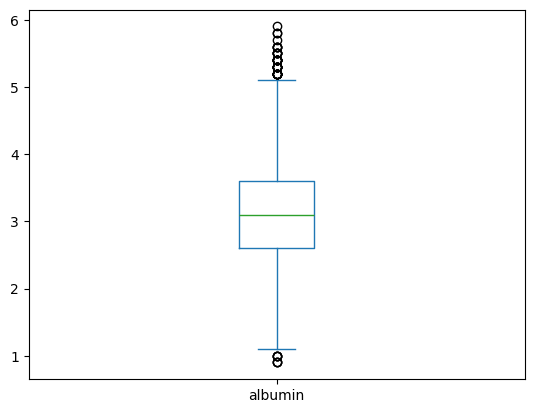

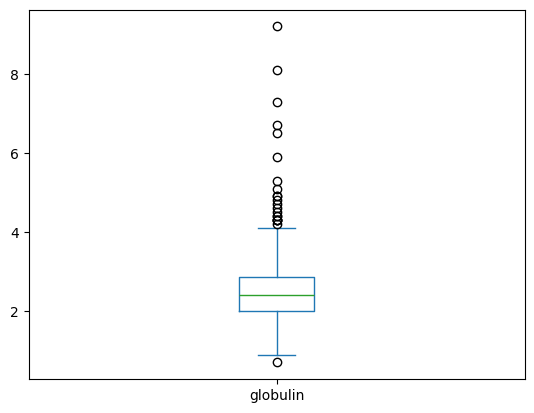

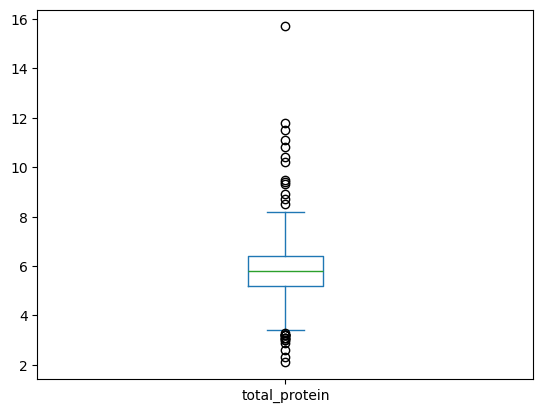

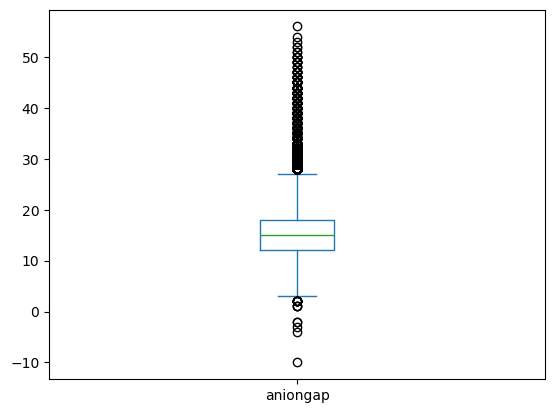

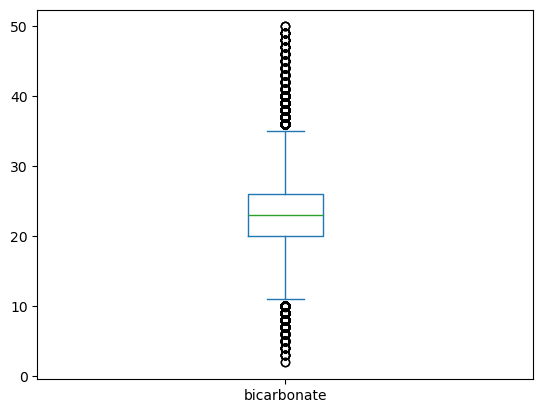

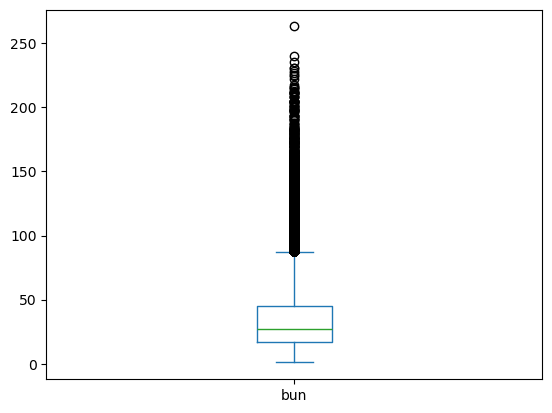

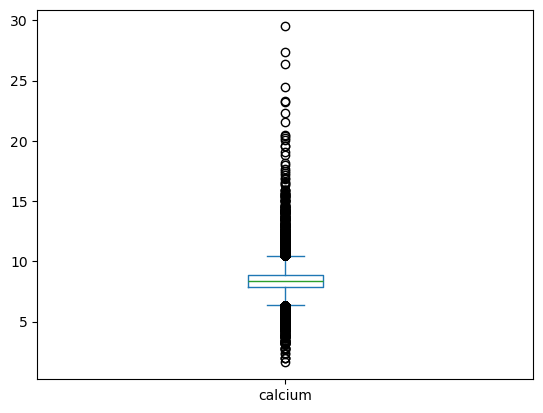

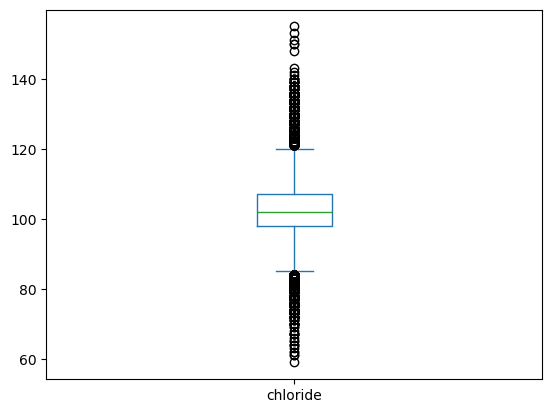

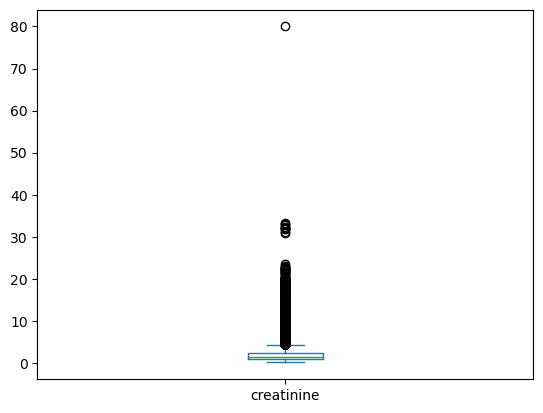

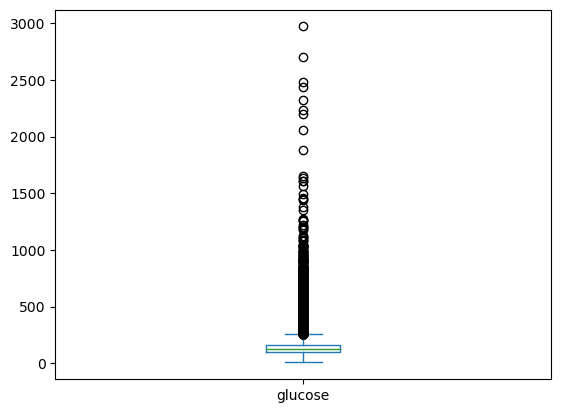

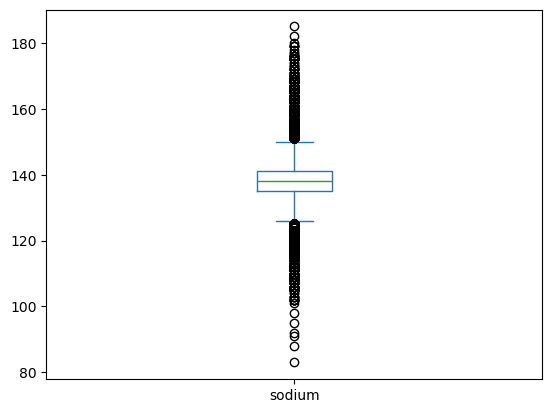

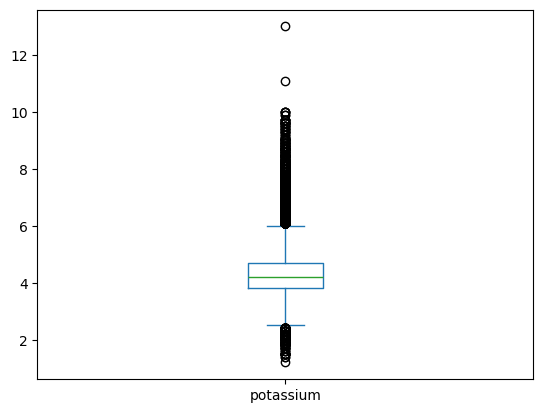

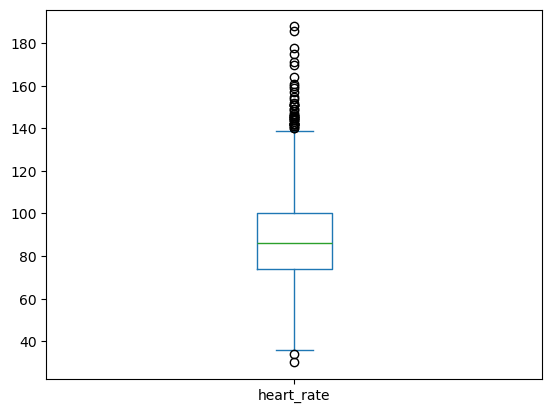

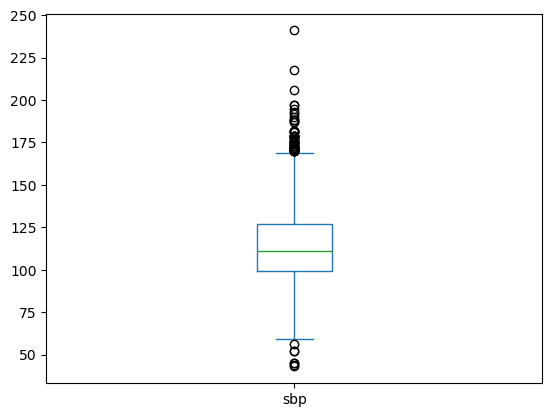

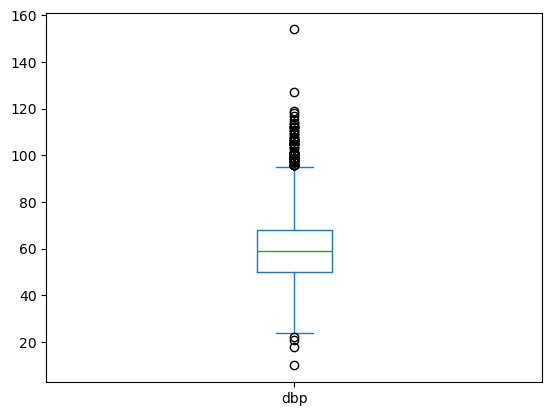

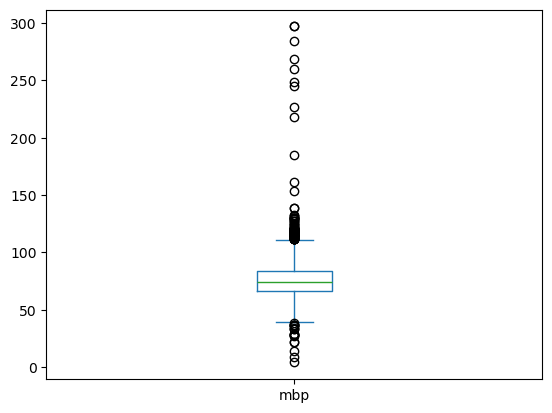

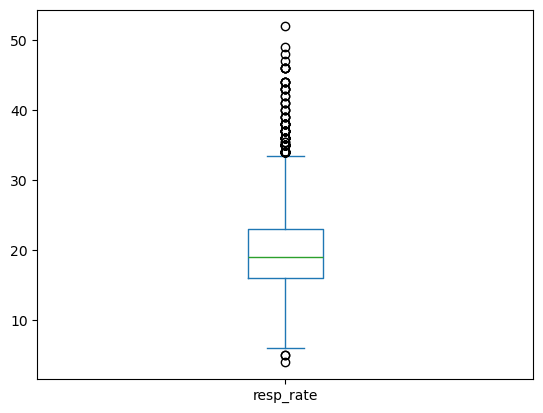

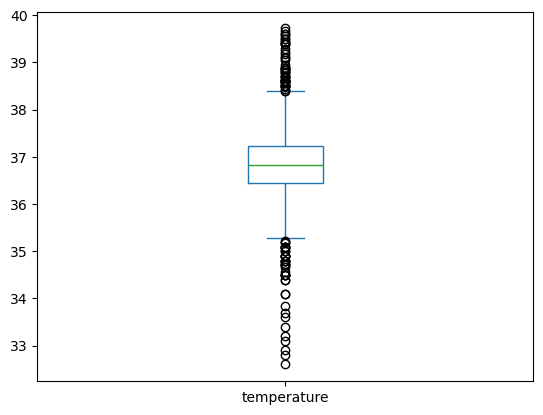

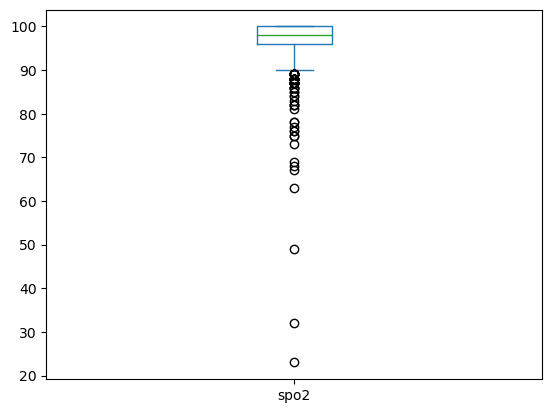

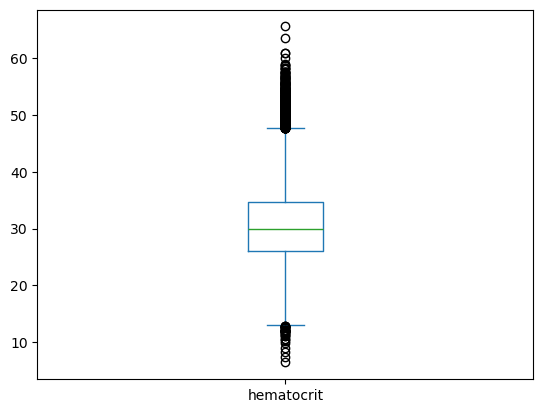

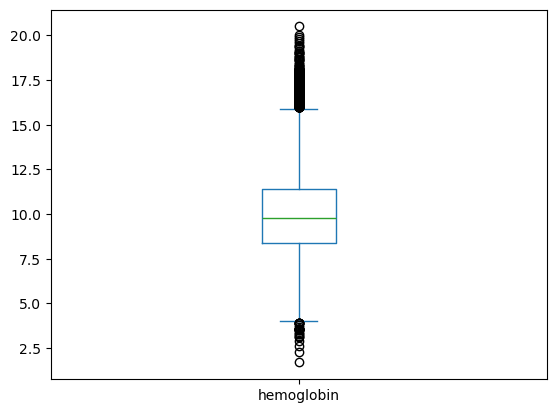

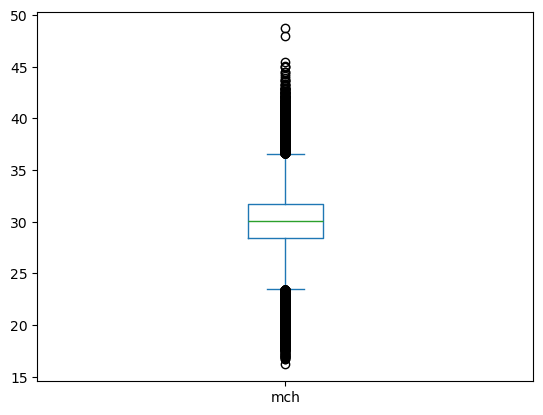

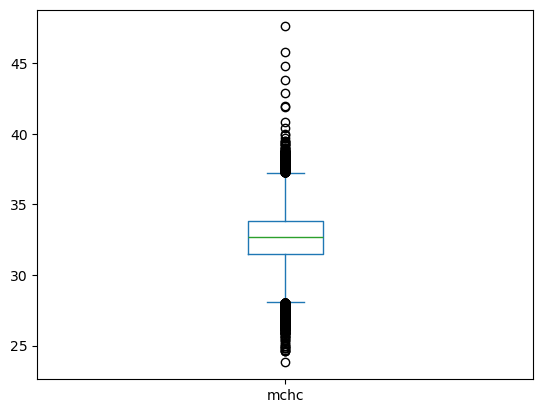

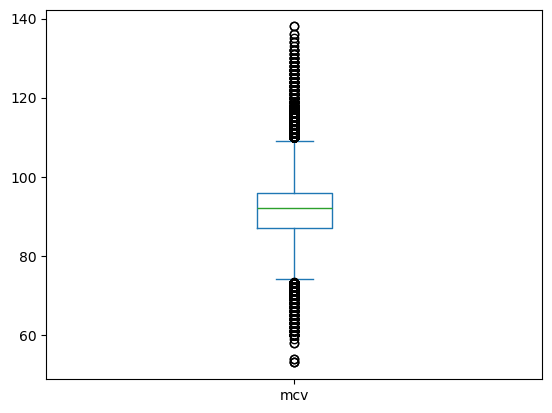

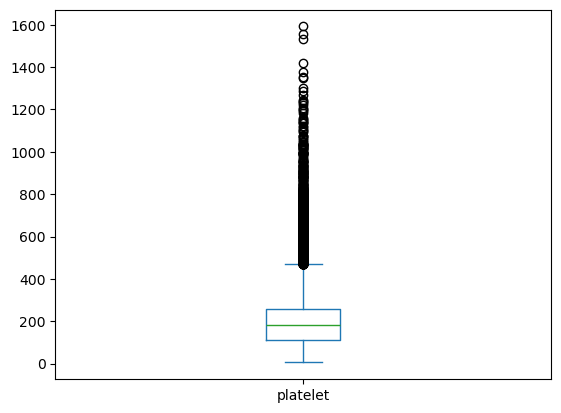

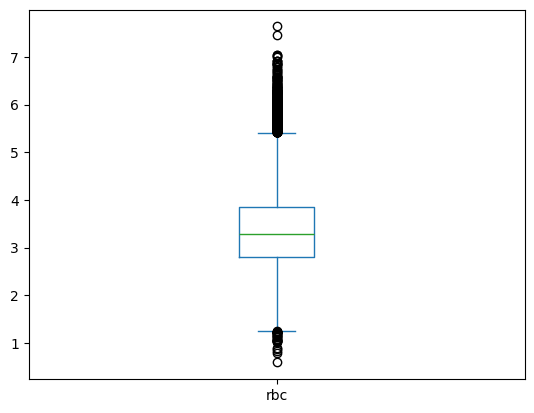

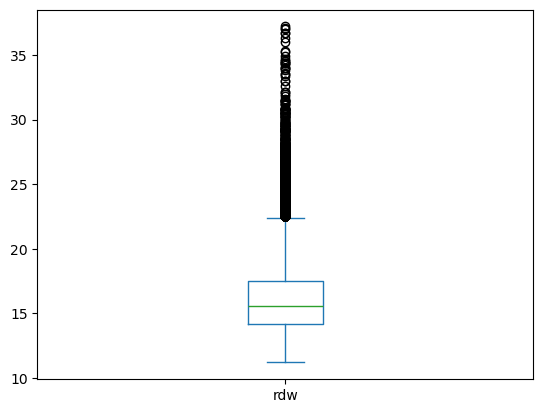

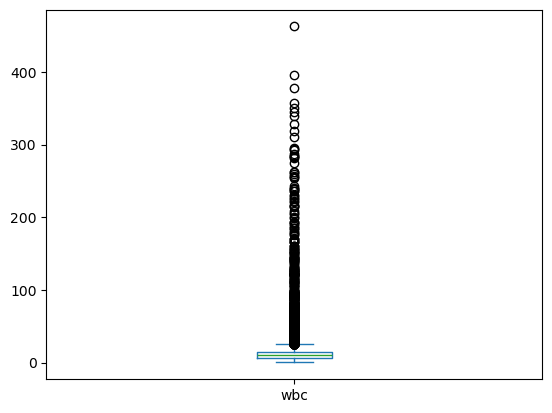

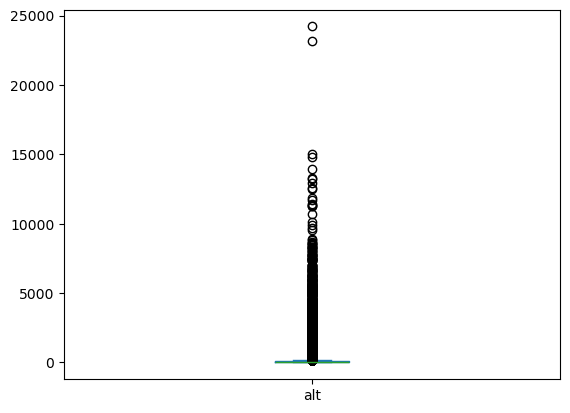

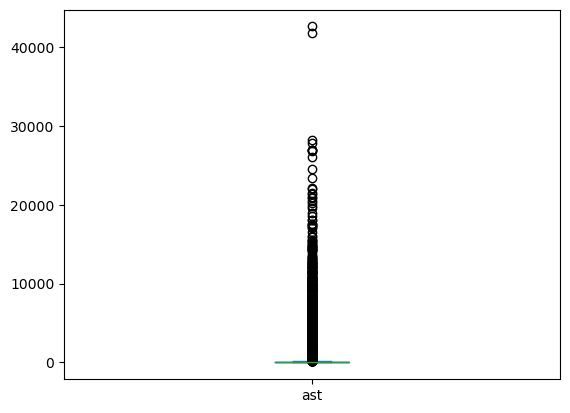

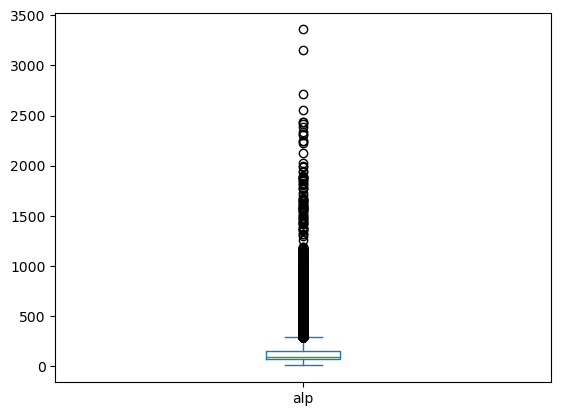

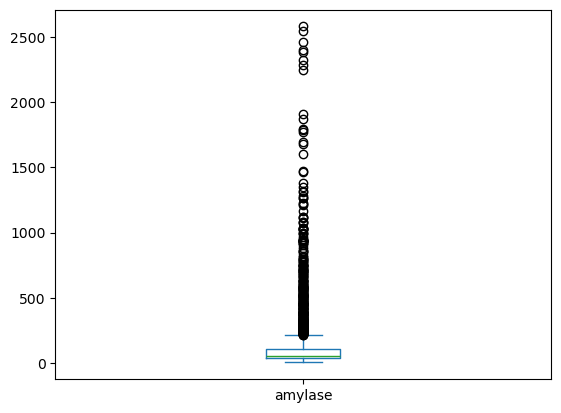

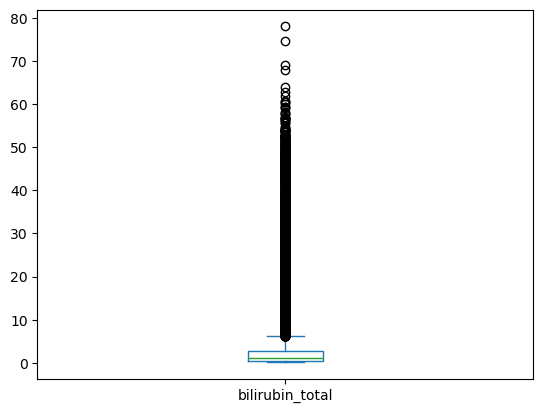

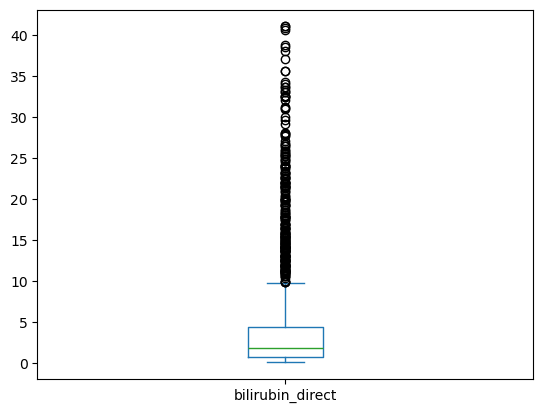

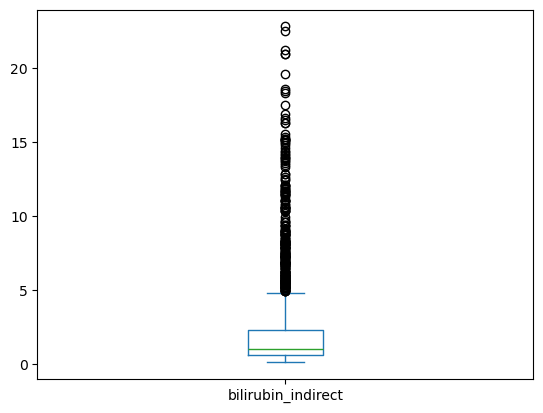

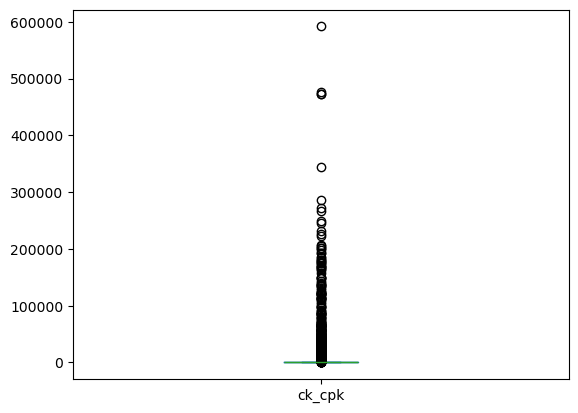

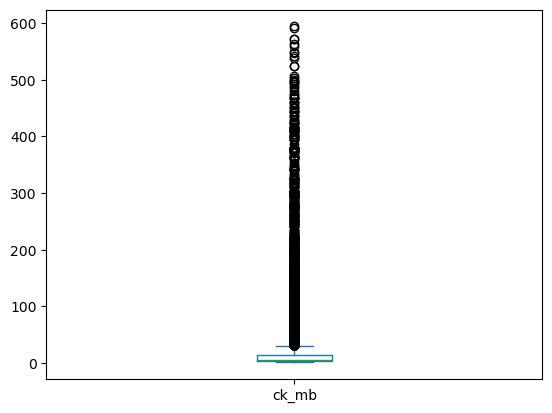

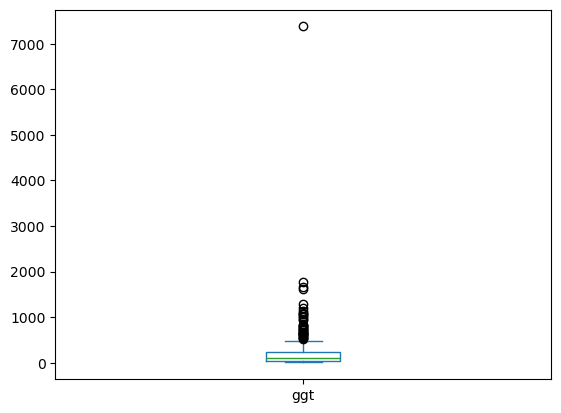

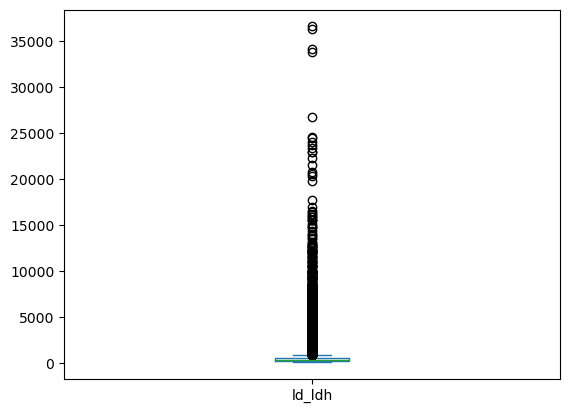

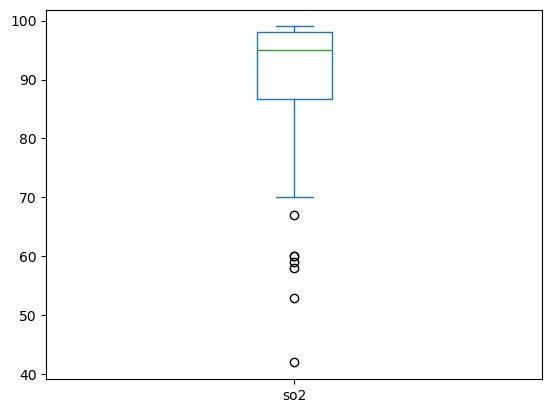

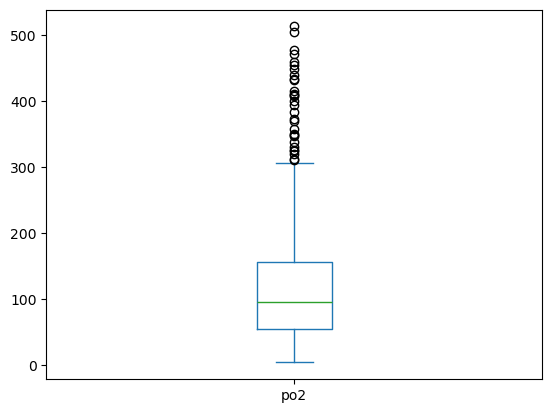

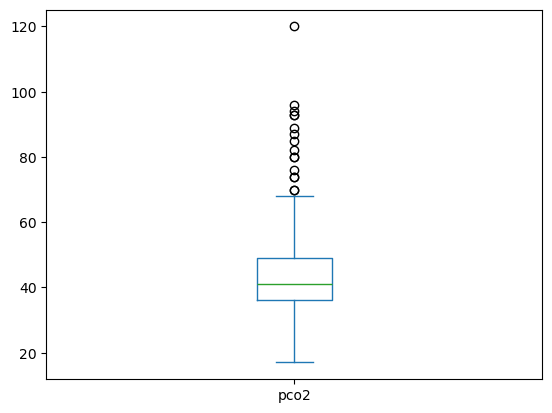

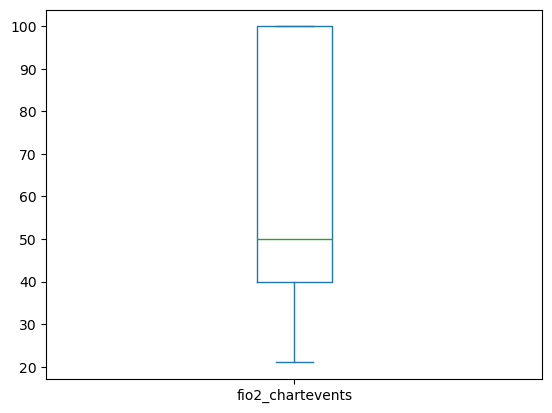

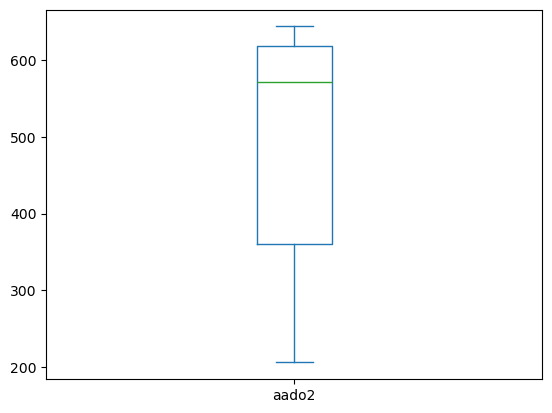

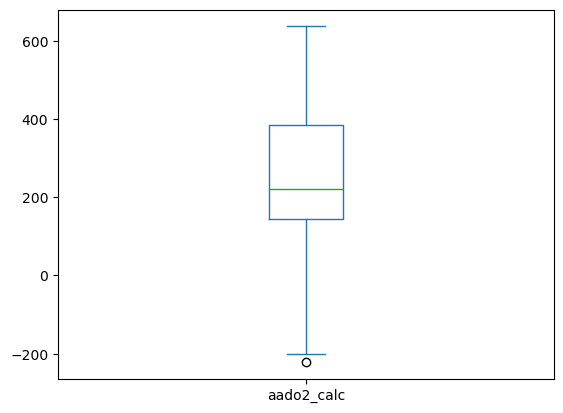

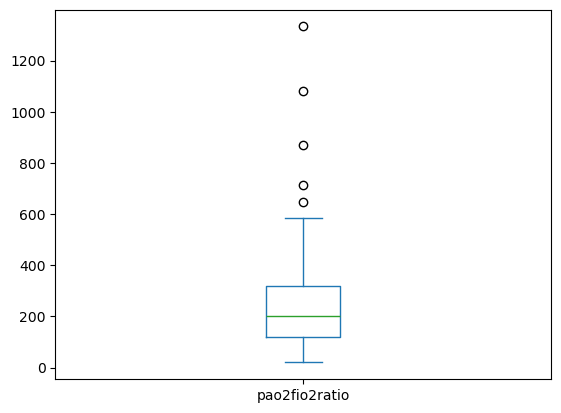

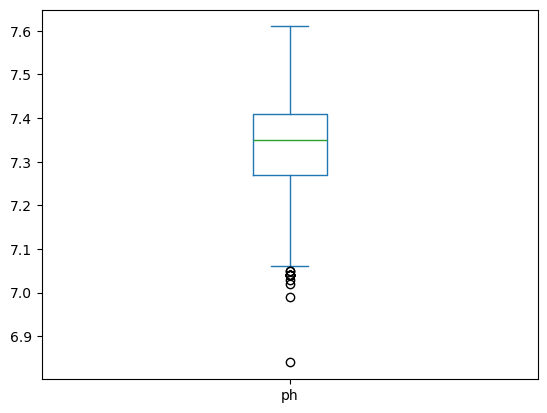

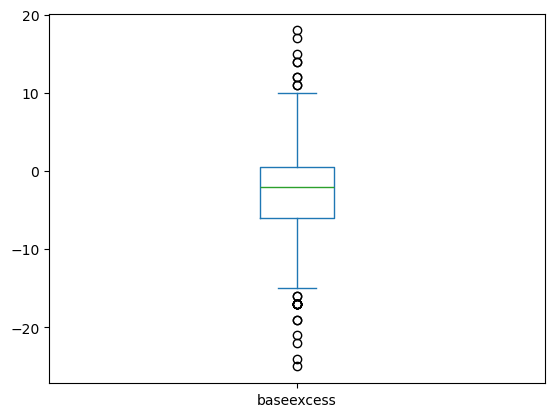

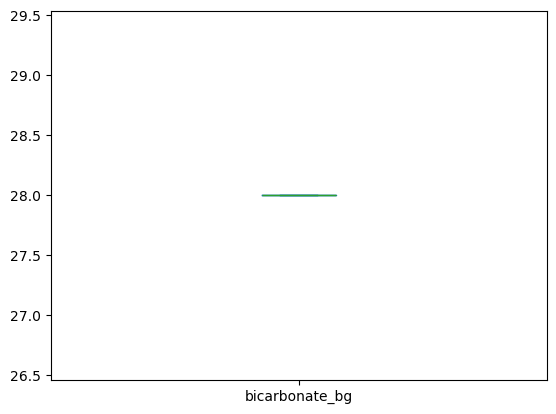

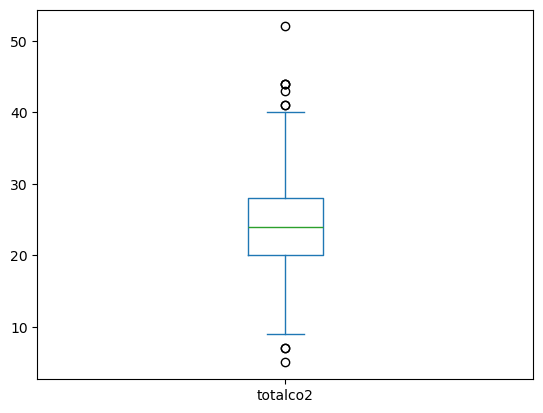

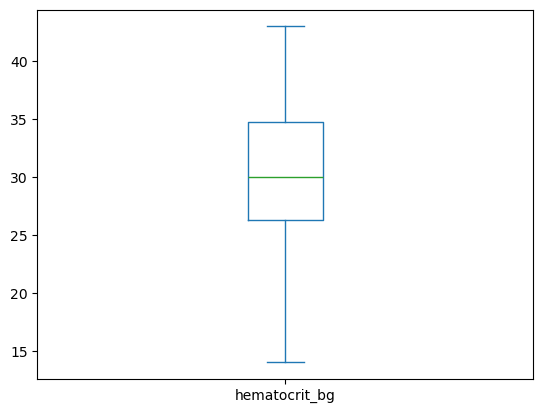

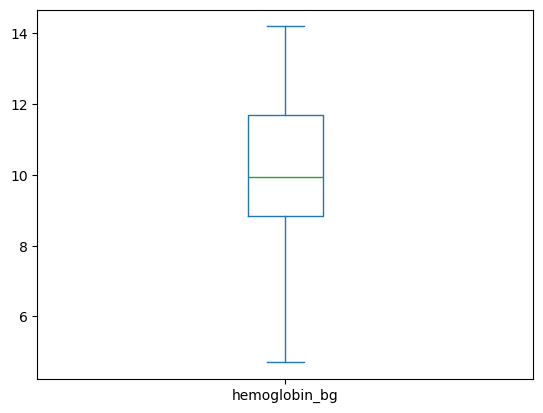

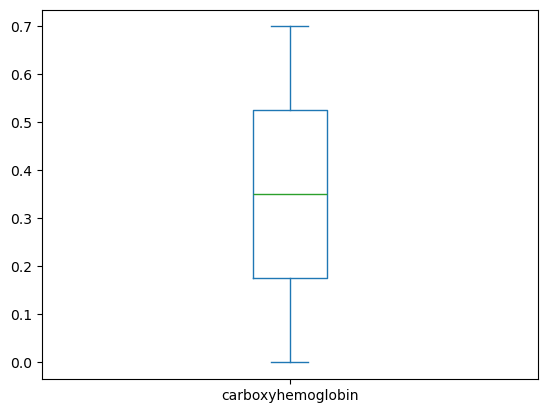

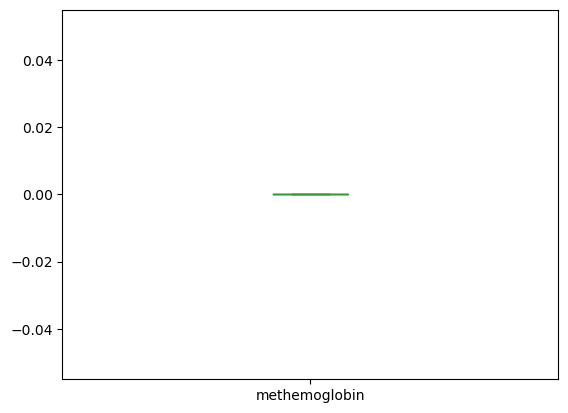

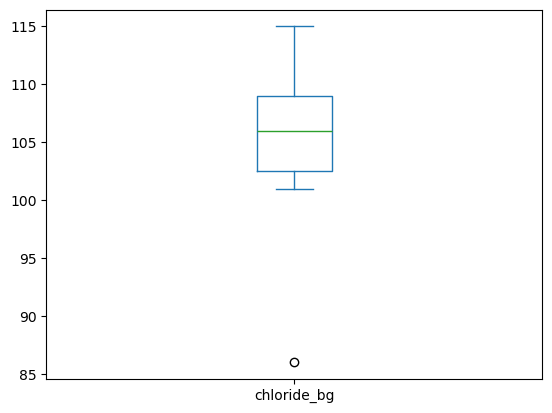

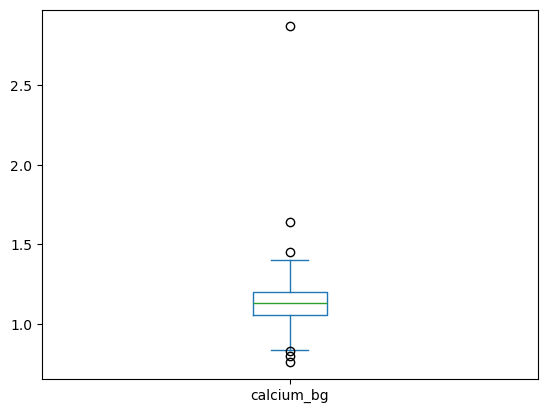

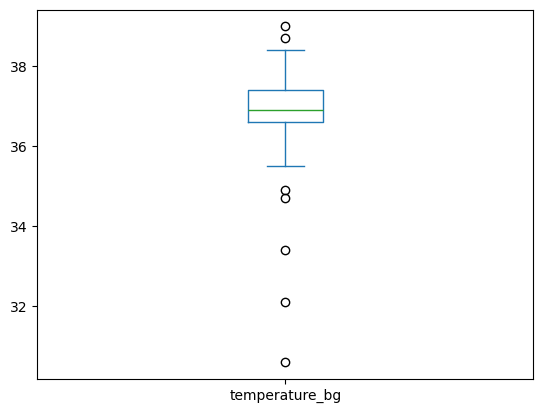

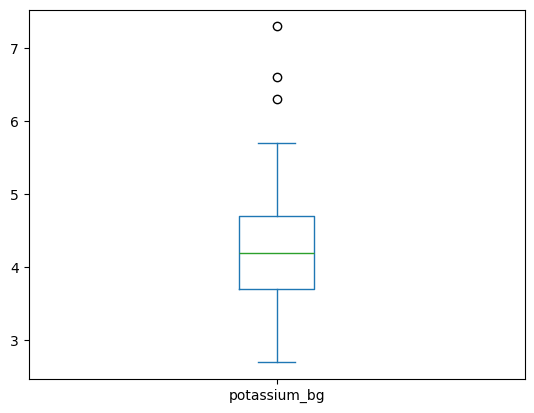

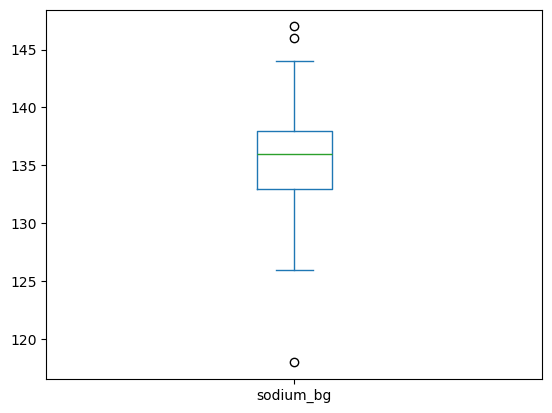

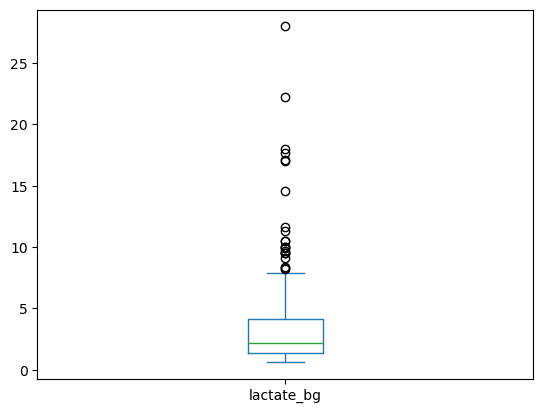

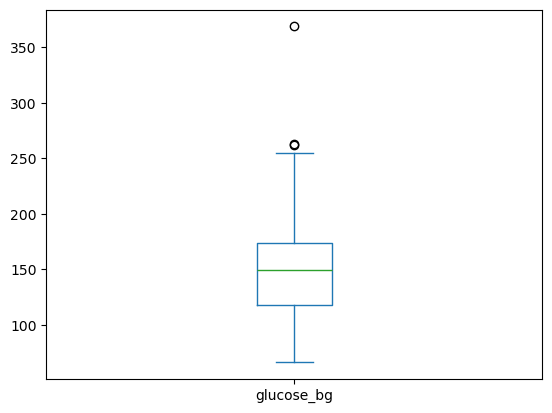

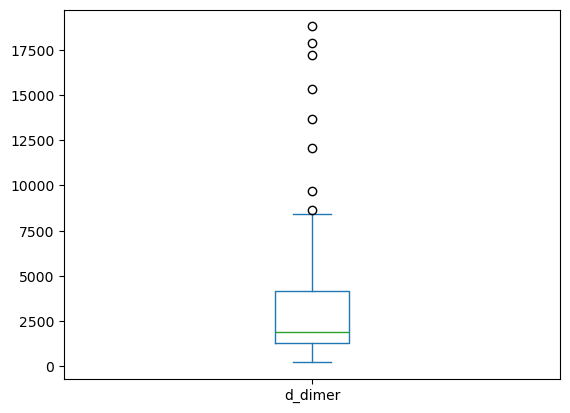

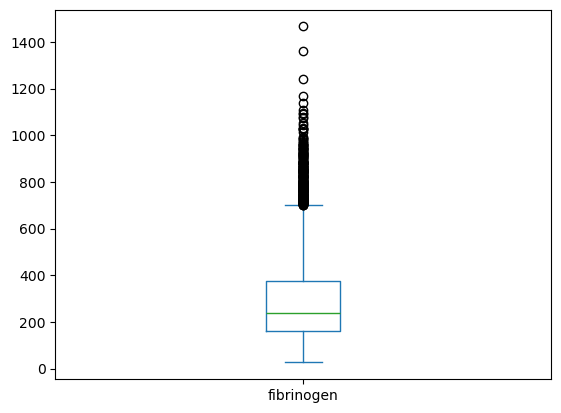

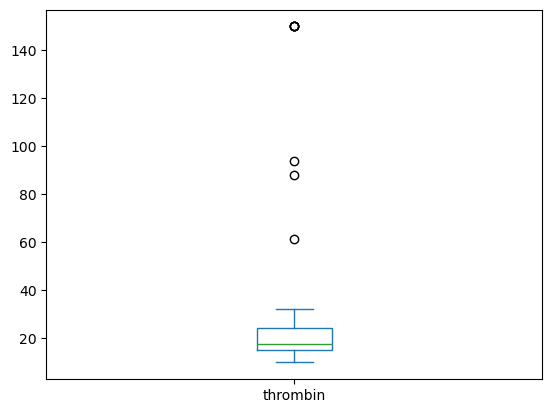

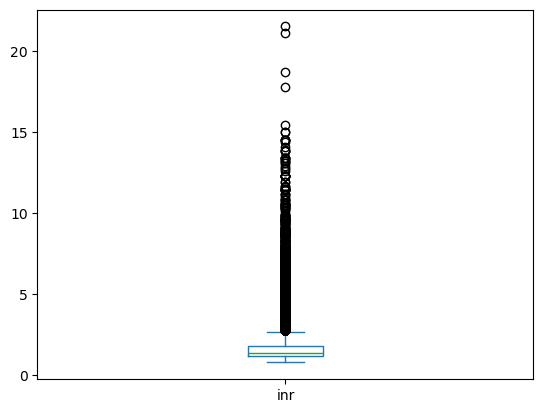

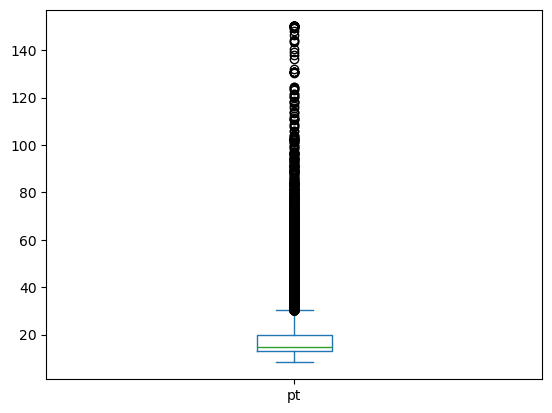

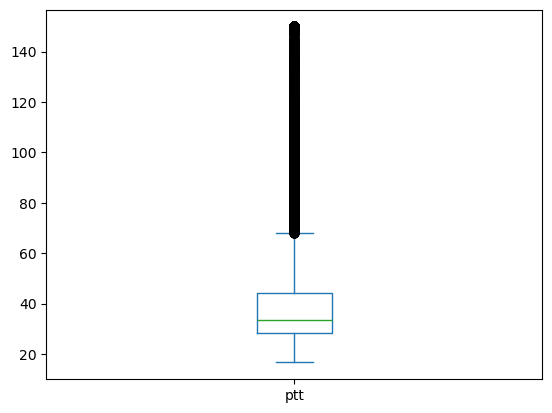

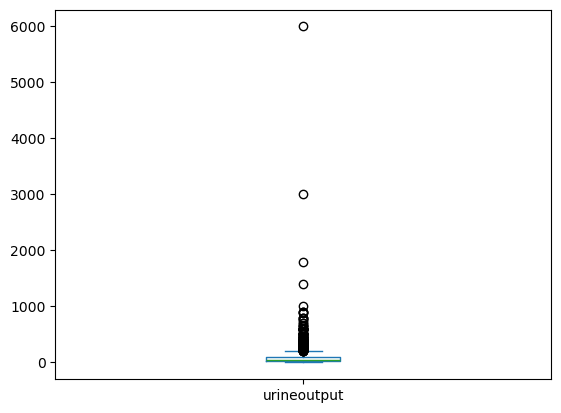

In [20]:
for col in dynamic.columns.to_list():
    if col == 'id':
        continue 
    if col == 'charttime':
        continue
    static_dynamic[col].plot(kind='box')
    plt.show()

# notes

In [21]:
notes = pd.read_csv('../data/notes.csv')

In [22]:
prev_shape = notes.shape
num_duplicated_rows = notes.duplicated().sum()
print(f'Number of duplicated rows {notes.duplicated().sum()}')
if num_duplicated_rows == 0:
    print('There are no duplicate rows to drop')
else: 
    print('Proceeding to drop duplicates...')
    notes = notes.drop_duplicates()
    print(f'dynamic shape has been reduced from {prev_shape} to {notes.shape}')

Number of duplicated rows 0
There are no duplicate rows to drop


Decision not to merge static_dynamic with notes.csv file. 

# Merge (static + dynamic)

In [23]:
df = static_dynamic.copy()

In [24]:
# account for missing data in static columns for the added rows via merge
df.sort_values(by='id', inplace=True)
static_cols_to_fill = static.columns.to_list()
df[static_cols_to_fill] = df.groupby('id')[static_cols_to_fill].ffill()
df[static_cols_to_fill] = df.groupby('id')[static_cols_to_fill].bfill()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93600 entries, 0 to 93599
Columns: 110 entries, id to urineoutput
dtypes: float64(72), int64(33), object(5)
memory usage: 79.3+ MB


In [26]:
df.head(10)

,id,hosp_admittime,hosp_dischtime,icu_intime,icu_outtime,los_icu,icu_death,gender,admission_age,weight_admit,...,sodium_bg,lactate_bg,glucose_bg,d_dimer,fibrinogen,thrombin,inr,pt,ptt,urineoutput
0,20001305,3/25/78 2:58,3/27/78 19:23,3/25/78 2:59,3/27/78 21:46,2.78,1,1,84.227760,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.3,14.1,33.1,NaN
1,20001305,3/25/78 2:58,3/27/78 19:23,3/25/78 2:59,3/27/78 21:46,2.78,1,1,84.227760,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20001305,3/25/78 2:58,3/27/78 19:23,3/25/78 2:59,3/27/78 21:46,2.78,1,1,84.227760,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.3,13.9,31.7,NaN
3,20001361,5/4/43 14:55,5/18/43 16:58,5/4/43 16:52,5/10/43 17:59,6.05,0,0,30.338465,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.6,17.2,29.2,NaN
4,20001361,5/4/43 14:55,5/18/43 16:58,5/4/43 16:52,5/10/43 17:59,6.05,0,0,30.338465,102.0,...,NaN,NaN,NaN,NaN,455.0,NaN,1.8,19.4,33.5,NaN
5,20001361,5/4/43 14:55,5/18/43 16:58,5/4/43 16:52,5/10/43 17:59,6.05,0,0,30.338465,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,20001361,5/4/43 14:55,5/18/43 16:58,5/4/43 16:52,5/10/43 17:59,6.05,0,0,30.338465,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.6,17.6,30.0,NaN
7,20001361,5/4/43 14:55,5/18/43 16:58,5/4/43 16:52,5/10/43 17:59,6.05,0,0,30.338465,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.6,17.7,30.0,NaN
8,20001770,1/25/17 19:12,2/9/17 16:40,1/25/17 20:47,1/28/17 17:35,2.87,0,1,35.067900,63.4,...,NaN,NaN,NaN,NaN,NaN,NaN,1.7,18.5,49.8,NaN
11,20002506,3/19/32 5:42,3/28/32 16:09,3/19/32 5:50,3/25/32 19:23,6.56,0,0,24.214207,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.2,13.2,30.9,NaN


In [27]:
dt_cols = ['hosp_admittime', 'hosp_dischtime', 'icu_intime', 'icu_outtime', 'charttime']
df[dt_cols] = df[dt_cols].apply(lambda x: pd.to_datetime(x, format='%m/%d/%y %H:%M'))
df[dt_cols].head()

,hosp_admittime,hosp_dischtime,icu_intime,icu_outtime,charttime
0,1978-03-25 02:58:00,1978-03-27 19:23:00,1978-03-25 02:59:00,1978-03-27 21:46:00,1978-03-25 21:55:00
1,1978-03-25 02:58:00,1978-03-27 19:23:00,1978-03-25 02:59:00,1978-03-27 21:46:00,1978-03-25 08:20:00
2,1978-03-25 02:58:00,1978-03-27 19:23:00,1978-03-25 02:59:00,1978-03-27 21:46:00,1978-03-25 13:45:00
3,2043-05-04 14:55:00,2043-05-18 16:58:00,2043-05-04 16:52:00,2043-05-10 17:59:00,2043-05-05 04:27:00
4,2043-05-04 14:55:00,2043-05-18 16:58:00,2043-05-04 16:52:00,2043-05-10 17:59:00,2043-05-04 17:24:00


# Remove inconsistent dates

In [28]:
dfr = df.copy()

In [29]:
dfr['diff_charttime_icuintime'] = dfr['charttime'] - dfr['icu_intime']
dfr['diff_charttime_icuoutime'] = dfr['charttime'] - dfr['icu_outtime']
dfr['diff_charttime_hospadmittime'] = dfr['charttime'] - dfr['hosp_admittime']
dfr['diff_charttime_hospdischtime'] = dfr['charttime'] - dfr['hosp_dischtime']
dfr['diff_hosptime'] = dfr['hosp_dischtime'] - dfr['hosp_admittime']
dfr['diff_icutime'] = dfr['icu_outtime'] - dfr['icu_intime']

In [30]:
diff =  ['diff_charttime_icuintime', 'diff_charttime_icuoutime', 'diff_charttime_hospadmittime', 'diff_charttime_hospdischtime', 'diff_hosptime', 'diff_icutime']
for i in diff: 
    print(f'{i}:\nMax: {dfr[i].max()}, Min: {dfr[i].min()}, Mean: {dfr[i].mean()}')

diff_charttime_icuintime:
Max: 1 days 18:00:00, Min: -177 days +02:50:00, Mean: -3 days +09:45:42.355769231
diff_charttime_icuoutime:
Max: 36523 days 21:55:00, Min: -181 days +08:26:00, Mean: -3 days +23:57:22.263461539
diff_charttime_hospadmittime:
Max: 178 days 00:05:00, Min: -36525 days +11:21:00, Mean: 3 days 11:50:37.626282051
diff_charttime_hospdischtime:
Max: 36518 days 11:39:00, Min: -249 days +15:35:00, Mean: -6 days +03:00:49.550641026
diff_hosptime:
Max: 248 days 10:46:00, Min: -36518 days +21:25:00, Mean: 9 days 08:49:48.075641025
diff_icutime:
Max: 101 days 17:25:00, Min: -36524 days +22:17:00, Mean: -1 days +09:48:20.092307693


In [31]:
neg_hosp_time = dfr['diff_hosptime'] < pd.Timedelta(0)
neg_icu_time = dfr['diff_icutime'] < pd.Timedelta(0)
neg_time = (neg_hosp_time | neg_icu_time) # rows with calculated negative LOS for hospitalisation and LOS for ICU
print(f'Number of rows with inconsistent calculated LOS: {neg_time.sum()}')

Number of rows with inconsistent calculated LOS: 34


In [32]:
print(f'Removing {neg_time.sum()} rows with inconsistent datetime')
original = df.shape
new = dfr.shape
print(f'Number of rows in df has changed from {original[0]} to {new[0]}\n')


Removing 34 rows with inconsistent datetime
Number of rows in df has changed from 93600 to 93600



In [33]:
print(f'Removing {neg_time.sum()} rows with inconsistent datetime')
original = df.shape
dfr = dfr[~neg_time]
new = dfr.shape
print(f'Number of rows in df has changed from {original[0]} to {new[0]}\n')

if df['id'].nunique() == dfr['id'].nunique():
    print(f"No changes in number of unique id. \nNumber of unique id: {df['id'].nunique()}")
else:
    print(f"Number of unique id has changed from {df['id'].nunique()} to {dfr['id'].nunique()}")

Removing 34 rows with inconsistent datetime
Number of rows in df has changed from 93600 to 93566

Number of unique id has changed from 20414 to 20403


In [34]:
for i in diff: 
    print(f'{i}:\nMax: {dfr[i].max()}, Min: {dfr[i].min()}, Mean: {dfr[i].mean()}')

diff_charttime_icuintime:
Max: 1 days 18:00:00, Min: -177 days +02:50:00, Mean: -3 days +09:44:12.950858218
diff_charttime_icuoutime:
Max: -1 days +23:23:00, Min: -181 days +08:26:00, Mean: -8 days +03:26:16.706068444
diff_charttime_hospadmittime:
Max: 178 days 00:05:00, Min: -2 days +18:16:00, Mean: 3 days 21:14:13.846055191
diff_charttime_hospdischtime:
Max: 0 days 18:20:00, Min: -249 days +15:35:00, Mean: -17 days +14:06:04.724151936
diff_hosptime:
Max: 248 days 10:46:00, Min: 0 days 00:58:00, Mean: 20 days 07:08:09.121903255
diff_icutime:
Max: 101 days 17:25:00, Min: 0 days 23:52:00, Mean: 5 days 06:17:56.244789774


In [35]:
less_than_1d_los_icu = dfr.loc[dfr['los_icu'] < 1]
print(f'Number of cases with los_icu < 1: {less_than_1d_los_icu.shape[0]}')

Number of cases with los_icu < 1: 0


In [36]:
df = dfr.drop(columns=diff).copy()

# Create timestamp start=0, end=24h

In [37]:
# Create time stamp 0 (so id cases without charttime notes between icu_intime and icu_intime+1d will not be deleted) 
temp = df[static.columns.to_list()].copy()
temp = temp.drop_duplicates()
temp['charttime'] = temp['icu_intime']

# concatenate with df, and sort rows by id and charttime
tstamp0 = pd.concat([temp, df], axis=0, ignore_index=True)
tstamp0 = tstamp0.sort_values(by=['id', 'charttime'])
print(f'{tstamp0.shape[0] - df.shape[0]} rows at timestamp 0h were created')

20403 rows at timestamp 0h were created


In [38]:
temp24 = df[static.columns.to_list()].copy()
temp24 = temp.drop_duplicates()
temp24['charttime'] = temp['icu_intime'] + pd.Timedelta(1440, unit='m')

tstamp24 = pd.concat([temp24, tstamp0], axis=0, ignore_index=True)
tstamp24 = tstamp24.sort_values(by=['id', 'charttime'])
print(f'{tstamp24.shape[0] - tstamp0.shape[0]} rows at timestamp 24h were created')

20403 rows at timestamp 24h were created


In [39]:
df = tstamp24.copy()

# ffill with historical data 

In [40]:
df1 = df.copy()
df1 = df1.sort_values(by=['id', 'charttime'])
col_to_fill = dynamic.columns.to_list() 
df1[col_to_fill] = df1.groupby('id')[col_to_fill].ffill()

In [41]:
pd.set_option('display.max_columns', None)
df[df['id'] == 20001305]

,id,hosp_admittime,hosp_dischtime,icu_intime,icu_outtime,los_icu,icu_death,gender,admission_age,weight_admit,height,admission_type,charlson_score,atrial_fibrillation,malignant_cancer,chf,ckd,cld,copd,diabetes,hypertension,ihd,stroke,race_american_indian,race_asian,race_black,race_hispanic_latino,race_missing,race_multiple_race,race_other,race_pacific_islander,race_unknown,race_white,first_careunit_ccu,first_careunit_cvicu,first_careunit_msicu,first_careunit_neuro_icu,first_careunit_neuro_intermediate,first_careunit_neuro_stepdown,first_careunit_sicu,first_careunit_tsicu,charttime,albumin,globulin,total_protein,aniongap,bicarbonate,bun,calcium,chloride,creatinine,glucose,sodium,potassium,heart_rate,sbp,dbp,mbp,resp_rate,temperature,spo2,hematocrit,hemoglobin,mch,mchc,mcv,platelet,rbc,rdw,wbc,alt,ast,alp,amylase,bilirubin_total,bilirubin_direct,bilirubin_indirect,ck_cpk,ck_mb,ggt,ld_ldh,so2,po2,pco2,fio2_chartevents,aado2,aado2_calc,pao2fio2ratio,ph,baseexcess,bicarbonate_bg,totalco2,hematocrit_bg,hemoglobin_bg,carboxyhemoglobin,methemoglobin,chloride_bg,calcium_bg,temperature_bg,potassium_bg,sodium_bg,lactate_bg,glucose_bg,d_dimer,fibrinogen,thrombin,inr,pt,ptt,urineoutput
20403,20001305,1978-03-25 02:58:00,1978-03-27 19:23:00,1978-03-25 02:59:00,1978-03-27 21:46:00,2.78,1,1,84.22776,44.0,155.0,1,12,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1978-03-25 02:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20404,20001305,1978-03-25 02:58:00,1978-03-27 19:23:00,1978-03-25 02:59:00,1978-03-27 21:46:00,2.78,1,1,84.22776,44.0,155.0,1,12,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1978-03-25 08:20:00,NaN,NaN,NaN,15.0,23.0,47.0,11.4,108.0,0.8,154.0,142.0,4.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20405,20001305,1978-03-25 02:58:00,1978-03-27 19:23:00,1978-03-25 02:59:00,1978-03-27 21:46:00,2.78,1,1,84.22776,44.0,155.0,1,12,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1978-03-25 13:45:00,NaN,NaN,NaN,13.0,25.0,48.0,10.8,107.0,0.9,149.0,140.0,4.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,13.9,31.7,NaN
20406,20001305,1978-03-25 02:58:00,1978-03-27 19:23:00,1978-03-25 02:59:00,1978-03-27 21:46:00,2.78,1,1,84.22776,44.0,155.0,1,12,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1978-03-25 21:55:00,NaN,NaN,NaN,13.0,24.0,50.0,10.8,108.0,0.9,131.0,141.0,4.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,14.1,33.1,NaN
0,20001305,1978-03-25 02:58:00,1978-03-27 19:23:00,1978-03-25 02:59:00,1978-03-27 21:46:00,2.78,1,1,84.22776,44.0,155.0,1,12,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1978-03-26 02:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
df1[df1['id'] == 20001305] # the dynamic data columns are forward filled (ref ck_cpk)

,id,hosp_admittime,hosp_dischtime,icu_intime,icu_outtime,los_icu,icu_death,gender,admission_age,weight_admit,height,admission_type,charlson_score,atrial_fibrillation,malignant_cancer,chf,ckd,cld,copd,diabetes,hypertension,ihd,stroke,race_american_indian,race_asian,race_black,race_hispanic_latino,race_missing,race_multiple_race,race_other,race_pacific_islander,race_unknown,race_white,first_careunit_ccu,first_careunit_cvicu,first_careunit_msicu,first_careunit_neuro_icu,first_careunit_neuro_intermediate,first_careunit_neuro_stepdown,first_careunit_sicu,first_careunit_tsicu,charttime,albumin,globulin,total_protein,aniongap,bicarbonate,bun,calcium,chloride,creatinine,glucose,sodium,potassium,heart_rate,sbp,dbp,mbp,resp_rate,temperature,spo2,hematocrit,hemoglobin,mch,mchc,mcv,platelet,rbc,rdw,wbc,alt,ast,alp,amylase,bilirubin_total,bilirubin_direct,bilirubin_indirect,ck_cpk,ck_mb,ggt,ld_ldh,so2,po2,pco2,fio2_chartevents,aado2,aado2_calc,pao2fio2ratio,ph,baseexcess,bicarbonate_bg,totalco2,hematocrit_bg,hemoglobin_bg,carboxyhemoglobin,methemoglobin,chloride_bg,calcium_bg,temperature_bg,potassium_bg,sodium_bg,lactate_bg,glucose_bg,d_dimer,fibrinogen,thrombin,inr,pt,ptt,urineoutput
20403,20001305,1978-03-25 02:58:00,1978-03-27 19:23:00,1978-03-25 02:59:00,1978-03-27 21:46:00,2.78,1,1,84.22776,44.0,155.0,1,12,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1978-03-25 02:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20404,20001305,1978-03-25 02:58:00,1978-03-27 19:23:00,1978-03-25 02:59:00,1978-03-27 21:46:00,2.78,1,1,84.22776,44.0,155.0,1,12,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1978-03-25 08:20:00,NaN,NaN,NaN,15.0,23.0,47.0,11.4,108.0,0.8,154.0,142.0,4.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20405,20001305,1978-03-25 02:58:00,1978-03-27 19:23:00,1978-03-25 02:59:00,1978-03-27 21:46:00,2.78,1,1,84.22776,44.0,155.0,1,12,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1978-03-25 13:45:00,NaN,NaN,NaN,13.0,25.0,48.0,10.8,107.0,0.9,149.0,140.0,4.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,13.9,31.7,NaN
20406,20001305,1978-03-25 02:58:00,1978-03-27 19:23:00,1978-03-25 02:59:00,1978-03-27 21:46:00,2.78,1,1,84.22776,44.0,155.0,1,12,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1978-03-25 21:55:00,NaN,NaN,NaN,13.0,24.0,50.0,10.8,108.0,0.9,131.0,141.0,4.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,14.1,33.1,NaN
0,20001305,1978-03-25 02:58:00,1978-03-27 19:23:00,1978-03-25 02:59:00,1978-03-27 21:46:00,2.78,1,1,84.22776,44.0,155.0,1,12,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1978-03-26 02:59:00,NaN,NaN,NaN,13.0,24.0,50.0,10.8,108.0,0.9,131.0,141.0,4.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,14.1,33.1,NaN


In [43]:
df = df1.copy()

# Drop rows that were charted before icu_intime and after 1 day of icu stay

In [44]:
df_temp = df.copy()

In [45]:
df_temp['diff_charttime_icuintime'] = df_temp['charttime'] - df_temp['icu_intime']

In [46]:
before_icu = df_temp['diff_charttime_icuintime'] < pd.Timedelta(0)
after_icu_1d = df_temp['diff_charttime_icuintime'] > pd.Timedelta(days=1)
out_of_time_period = (before_icu | after_icu_1d)
print(f'Number of rows out of period of interest: {out_of_time_period.sum()}')

Number of rows out of period of interest: 40539


In [47]:
original = df_temp.shape
df_temp = df_temp[~out_of_time_period]
new = df_temp.shape
print(f'Number of rows in df has changed from {original[0]} to {new[0]}')

Number of rows in df has changed from 134372 to 93833


In [49]:
if df['id'].nunique() == df_temp['id'].nunique():
    print(f"No changes in number of unique id.\nNumber of unique id: {df_temp['id'].nunique()}")
else:
    print(f"Number of unique id has changed from {df['id'].nunique()} to {df_temp['id'].nunique()}")

No changes in number of unique id.
Number of unique id: 20403


In [50]:
df_temp.drop(columns='diff_charttime_icuintime', inplace=True)

In [51]:
df = df_temp.copy()

# Resample hourly

In [52]:
df_resample = df.copy()

In [53]:
df_resample = df_resample.sort_values(by=['id', 'charttime'])
df_resample.set_index('charttime', inplace=True)

In [54]:
df_resample = df_resample.groupby('id').resample('h').mean().ffill()

In [55]:
df_resample.head(51)

id      hosp_admittime  \
id       charttime                                             
20001305 1978-03-25 02:00:00  20001305.0 1978-03-25 02:58:00   
         1978-03-25 03:00:00  20001305.0 1978-03-25 02:58:00   
         1978-03-25 04:00:00  20001305.0 1978-03-25 02:58:00   
         1978-03-25 05:00:00  20001305.0 1978-03-25 02:58:00   
         1978-03-25 06:00:00  20001305.0 1978-03-25 02:58:00   
         1978-03-25 07:00:00  20001305.0 1978-03-25 02:58:00   
         1978-03-25 08:00:00  20001305.0 1978-03-25 02:58:00   
         1978-03-25 09:00:00  20001305.0 1978-03-25 02:58:00   
         1978-03-25 10:00:00  20001305.0 1978-03-25 02:58:00   
         1978-03-25 11:00:00  20001305.0 1978-03-25 02:58:00   
         1978-03-25 12:00:00  20001305.0 1978-03-25 02:58:00   
         1978-03-25 13:00:00  20001305.0 1978-03-25 02:58:00   
         1978-03-25 14:00:00  20001305.0 1978-03-25 02:58:00   
         1978-03-25 15:00:00  20001305.0 1978-03-25 02:58:00   
         1978-03-25 16:00:00  20001305.0 1978-03-25 02:58:00   
         1978-03-25 17:00:00  20001305.0 1978-03-25 02:58:00   
         1978-03-25 18:00:00  20001305.0 1978-03-25 02:58:00   
         1978-03-25 19:00:00  20001305.0 1978-03-25 02:58:00   
         1978-03-25 20:00:00  20001305.0 1978-03-25 02:58:00   
         1978-03-25 21:00:00  20001305.0 1978-03-25 02:58:00   
         1978-03-25 22:00:00  20001305.0 1978-03-25 02:58:00   
         1978-03-25 23:00:00  20001305.0 1978-03-25 02:58:00   
         1978-03-26 00:00:00  20001305.0 1978-03-25 02:58:00   
         1978-03-26 01:00:00  20001305.0 1978-03-25 02:58:00   
         1978-03-26 02:00:00  20001305.0 1978-03-25 02:58:00   
20001361 2043-05-04 16:00:00  20001361.0 2043-05-04 14:55:00   
         2043-05-04 17:00:00  20001361.0 2043-05-04 14:55:00   
         2043-05-04 18:00:00  20001361.0 2043-05-04 14:55:00   
         2043-05-04 19:00:00  20001361.0 2043-05-04 14:55:00   
         2043-05-04 20:00:00  20001361.0 2043-05-04 14:55:00   
         2043-05-04 21:00:00  20001361.0 2043-05-04 14:55:00   
         2043-05-04 22:00:00  20001361.0 2043-05-04 14:55:00   
         2043-05-04 23:00:00  20001361.0 2043-05-04 14:55:00   
         2043-05-05 00:00:00  20001361.0 2043-05-04 14:55:00   
         2043-05-05 01:00:00  20001361.0 2043-05-04 14:55:00   
         2043-05-05 02:00:00  20001361.0 2043-05-04 14:55:00   
         2043-05-05 03:00:00  20001361.0 2043-05-04 14:55:00   
         2043-05-05 04:00:00  20001361.0 2043-05-04 14:55:00   
         2043-05-05 05:00:00  20001361.0 2043-05-04 14:55:00   
         2043-05-05 06:00:00  20001361.0 2043-05-04 14:55:00   
         2043-05-05 07:00:00  20001361.0 2043-05-04 14:55:00   
         2043-05-05 08:00:00  20001361.0 2043-05-04 14:55:00   
         2043-05-05 09:00:00  20001361.0 2043-05-04 14:55:00   
         2043-05-05 10:00:00  20001361.0 2043-05-04 14:55:00   
         2043-05-05 11:00:00  20001361.0 2043-05-04 14:55:00   
         2043-05-05 12:00:00  20001361.0 2043-05-04 14:55:00   
         2043-05-05 13:00:00  20001361.0 2043-05-04 14:55:00   
         2043-05-05 14:00:00  20001361.0 2043-05-04 14:55:00   
         2043-05-05 15:00:00  20001361.0 2043-05-04 14:55:00   
         2043-05-05 16:00:00  20001361.0 2043-05-04 14:55:00   
20001770 2017-01-25 20:00:00  20001770.0 2017-01-25 19:12:00   

                                  hosp_dischtime          icu_intime  \
id       charttime                                                     
20001305 1978-03-25 02:00:00 1978-03-27 19:23:00 1978-03-25 02:59:00   
         1978-03-25 03:00:00 1978-03-27 19:23:00 1978-03-25 02:59:00   
         1978-03-25 04:00:00 1978-03-27 19:23:00 1978-03-25 02:59:00   
         1978-03-25 05:00:00 1978-03-27 19:23:00 1978-03-25 02:59:00   
         1978-03-25 06:00:00 1978-03-27 19:23:00 1978-03-25 02:59:00   
         1978-03-25 07:00:00 1978-03-27 19:23:00 1978-03-25 02:59:00   
         1978-03-25 08:00:00 1978-03-27 19:23:00 1978-03-25 02:59:00 

In [57]:
print(f"Number of unique id: {df_resample['id'].nunique()}")
print(f'Shape: {df_resample.shape}')

Number of unique id: 20403
Shape: (510075, 109)


In [58]:
pd.set_option('display.max_rows', None)
df_resample.isnull().mean().sort_values(ascending=False)

bicarbonate_bg                       0.543304
methemoglobin                        0.124707
carboxyhemoglobin                    0.124707
aado2                                0.116677
d_dimer                              0.076361
chloride_bg                          0.063179
hemoglobin_bg                        0.063179
hematocrit_bg                        0.063179
thrombin                             0.023036
sodium_bg                            0.019278
potassium_bg                         0.013678
so2                                  0.013678
glucose_bg                           0.013678
calcium_bg                           0.013678
lactate_bg                           0.008732
ggt                                  0.003337
aado2_calc                           0.002286
pco2                                 0.002286
fio2_chartevents                     0.002286
temperature_bg                       0.002286
pao2fio2ratio                        0.002286
ph                                

In [59]:
df = df_resample.drop(columns='id')

In [60]:
df.to_csv('../data/static_dynamic.csv')